# Map Projections, Coordinate Reference Systems, and Plotting

https://web.microsoftstream.com/video/44306a2d-fdba-40fd-81a9-e07d3c8d88df

https://colab.research.google.com/drive/13IX2tqQQElNBZvM9NIr5QOHoICI6zQdV

In this tutorial, we will show how to plot geometric representations of county boundaries (polygons), streets (lines), and locations of interest (points). Using publicly available data shapefiles from the Census Bureau insert link, DC Open Data Portal insert link, and Richmond Data Portals insert link, we will show you how to overlay each of these datasets and apply the concepts we reviewed in the lecture covering map projections, coordinate reference systems, and geometric representations.

#### 3d Representations: Geodetic Datums

- Provide us GPS coordinated, which enable us to identify specific locations on earth. 
    - Universal standard is WGS84 - when you see coordinates about locations, it's typically that. Almost all of what you do will be this. 
    - NAD83 and NAD27 are other ones you might see -> Usually more local to North America. 
    - More specifically used for local regions in other areas have their own too. 
    - As I move away from the equator, sizes will change (local distortions due to map projections)
 - Differences with the systems 
     - WGS84 apparently is closer to the origin of the earth
     - 2D Representations: Azimuthal, Conical, and Cylindrical give you different projections basically
  - Common projections 
      - Robinson for global conformity
      - Albers Conical (Area) Retain area and preserve area so you can compare
      - UTM for very small areas - by rotating earth along line in middle, you can divide earth into 60 different slices and take each slice and expand n. Helps preserve distance and scale. 
- How do I pick the right projection?
    - Represent faithfully in terms of shape? Measure distance? Measure area? Large or small area? 
    - Good sources in the video for a matrix to help you choose
    - Example
        - Albers equal area conic good for discerning equal areas and for continent size areas, regions, or small to medium country that span east west and are closer to middle latitudes (US good here)
        - Azimuthal good for preserving directions


#### Geopandas DF
- Can create from multiple sources, including shapefiles 

#### Coordinate Reference System - CRS
- Spatial Reference ID - Unique value to differentiate spatial projections
- EPSG - Authority that keeps a taxonomy of different values for each of the projections
    - EPSG4326 is the identifier for WGS84
    - 32146 for Northern Virginia would change the coordinates if you transformed
- Important to know which datum/projection your data is from 
    - When reading in the file, it sometimes has that information in it itself
    - Whatever program you are using needs to know the starting point, so that when it is converting to different projections it can know the right formula to use 

In [1]:
!pip install geopandas

In [2]:
import os
import shapely
import requests
import pandas as pd
import geopandas as gpd

### Defining some functions
We will use the functions below to download and extract the geographic data we will be using throughout this exercise. Each of them makes a set of empty directories, downloads the appropriate file based on the fips id, and extracts the data from a `.zip` file.

In [3]:
def dwnld_extract_county_boundaries(loc, state_fips):
    os.makedirs('./shapefiles/{}'.format(loc), exist_ok=True)

    url = 'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_{}_county10.zip'.format(state_fips)
    r = requests.get(url)
    with open('./shapefiles/{}/{}.zip'.format(loc, loc),'wb') as f: 
        f.write(r.content)

    os.system('unzip ./shapefiles/{}/{}.zip -d ./shapefiles/{}/'.format(loc, loc, loc))


def dwnld_extract_county_streets(loc, county_fip):
    os.makedirs('./shapefiles/county_streets/{}'.format(loc), exist_ok=True)
    url = 'https://www2.census.gov/geo/tiger/TIGER2010/ROADS/tl_2010_{}_roads.zip'.format(county_fip)
    r = requests.get(url)
    with open('./shapefiles/county_streets/{}/{}.zip'.format(loc, loc),'wb') as f: 
        f.write(r.content)

    os.system('unzip ./shapefiles/county_streets/{}/{}.zip -d ./shapefiles/county_streets/{}/'.format(loc, loc, loc))

# The above is to get all of these census shape files 

Downloading County Boundary Data

In [4]:
shape_files = {'us_county':'us',
               'maryland_county': '24',
               'virginia_county': '51',
               'dc_county': '11',}
  
for loc, id in shape_files.items():
    dwnld_extract_county_boundaries(loc, id)

Read County Boundary Data

In [5]:
va_shp = gpd.read_file('./shapefiles/virginia_county/tl_2010_51_county10.shp')
dc_shp = gpd.read_file('./shapefiles/dc_county/tl_2010_11_county10.shp')
md_shp = gpd.read_file('./shapefiles/maryland_county/tl_2010_24_county10.shp')

In [6]:
va_shp

# We have a polygon and rather than a tupple of two, we have a bunch more because we are plotting a bunch of points and 
# then connecting them together

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,51,011,01497238,51011,Appomattox,Appomattox County,06,H1,G4020,None,31340,None,A,863744566,3204517,+37.3707253,-078.8109404,"POLYGON ((-78.97222 37.34978, -78.97248 37.350..."
1,51,017,01673638,51017,Bath,Bath County,06,H1,G4020,None,None,None,A,1370512659,14049862,+38.0689876,-079.7328980,"POLYGON ((-79.93330 37.95328, -79.93337 37.953..."
2,51,045,01673664,51045,Craig,Craig County,06,H1,G4020,None,40220,None,A,853489575,2798854,+37.4731287,-080.2317340,"POLYGON ((-80.44496 37.35032, -80.44596 37.352..."
3,51,103,01480139,51103,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,345115848,254201621,+37.7038306,-076.4131985,"POLYGON ((-76.42441 37.62297, -76.42736 37.623..."
4,51,041,01480111,51041,Chesterfield,Chesterfield County,06,H1,G4020,None,40060,None,A,1096334108,35372995,+37.3784337,-077.5858474,"POLYGON ((-77.76262 37.48449, -77.76156 37.485..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,51,031,01674917,51031,Campbell,Campbell County,06,H1,G4020,None,31340,None,A,1305008854,8962147,+37.2101510,-079.0954285,"POLYGON ((-79.29484 37.29710, -79.29351 37.299..."
130,51,089,01502770,51089,Henry,Henry County,06,H1,G4020,None,32300,None,A,990240760,5299482,+36.6205930,-079.9805843,"POLYGON ((-80.01203 36.78964, -80.01190 36.790..."
131,51,015,01480098,51015,Augusta,Augusta County,06,H1,G4020,None,44420,None,A,2504515631,9987990,+38.1678073,-079.1466816,"POLYGON ((-79.36778 38.01810, -79.37391 38.021..."
132,51,800,01498560,51800,Suffolk,Suffolk city,25,C7,G4020,None,47260,None,F,1036429624,74908984,+36.6971573,-076.6347807,"POLYGON ((-76.57690 36.88310, -76.57667 36.883..."


Plot county boundaries 

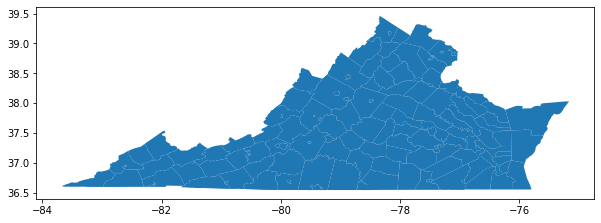

In [7]:
va_shp.plot(figsize=(10,10))

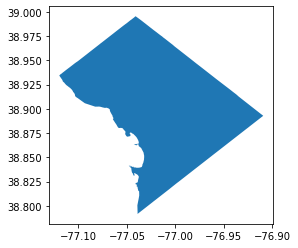

In [8]:
dc_shp.plot()

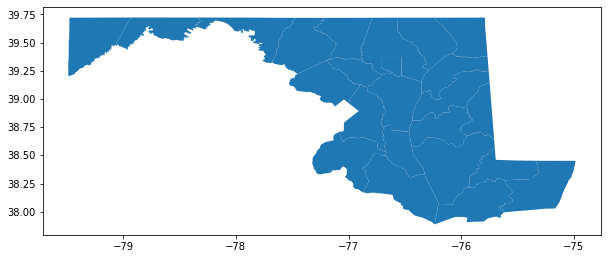

In [9]:
md_shp.plot(figsize=(10,10))

To see the CRS of data: 

In [10]:
va_shp.crs

{'init': 'epsg:4269'}

Setting the right Coordinate Reference System (CRS) Code

In [11]:
md_shp = md_shp.to_crs(epsg = 32146)
va_shp = va_shp.to_crs(epsg = 32146)
dc_shp = dc_shp.to_crs(epsg = 32146)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


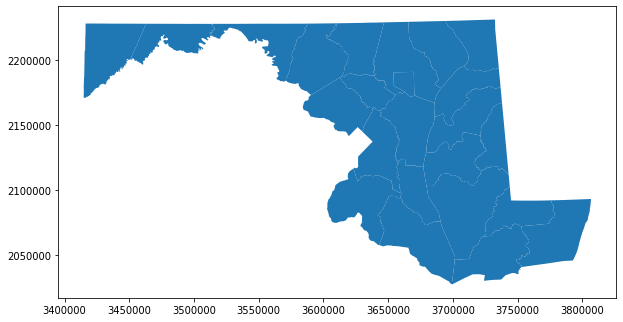

In [12]:
md_shp.plot(figsize=(10,10))

# Already see changes below

Modifying plot characteristics (color, size, line width, etc.) - And plot together

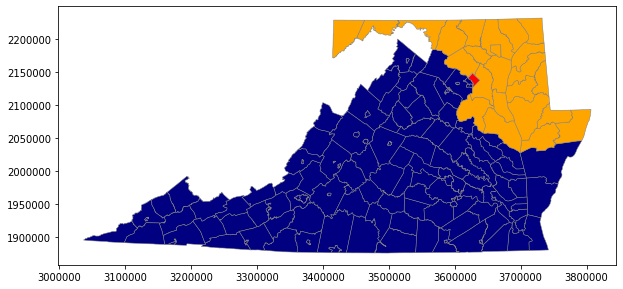

In [14]:
md_shp.plot(color = 'orange',
            edgecolor = 'gray',
            linewidth = .5,
            ax = va_shp.plot(color='navy',
                             edgecolor ='gray',
                             linewidth = .5,
                             ax = dc_shp.plot(color='red',
                                              edgecolor ='gray',
                                              linewidth = .5,
                                              figsize = (10,10))))

Appending county boundary data and plotting as a single data set

In [15]:
dmv_shp = dc_shp.append(md_shp)
dmv_shp = dmv_shp.append(va_shp)
dmv_shp = dmv_shp.to_crs(epsg=32146)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [16]:
dmv_shp

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,11,001,01702382,11001,District of Columbia,District of Columbia,00,H6,G4020,548,47900,47894,F,158114680,18884970,+38.9041485,-077.0170942,"POLYGON ((3634326.277 2140859.068, 3634470.383..."
0,24,029,00593907,24029,Kent,Kent County,06,H1,G4020,None,None,None,A,717505271,353313295,+39.2391765,-076.1242003,"POLYGON ((3687545.260 2173512.770, 3688076.886..."
1,24,017,01676992,24017,Charles,Charles County,06,H1,G4020,548,47900,47894,A,1185563933,479715576,+38.4728532,-077.0154272,"POLYGON ((3621167.918 2078854.467, 3621136.574..."
2,24,011,00595737,24011,Caroline,Caroline County,06,H1,G4020,None,None,None,A,827292416,16789670,+38.8715312,-075.8316311,"POLYGON ((3729534.766 2118019.557, 3729456.680..."
3,24,001,01713506,24001,Allegany,Allegany County,06,H1,G4020,None,19060,None,A,1098563627,14954037,+39.6123087,-078.7031084,"POLYGON ((3479203.805 2228299.708, 3479237.162..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,51,031,01674917,51031,Campbell,Campbell County,06,H1,G4020,None,31340,None,A,1305008854,8962147,+37.2101510,-079.0954285,"POLYGON ((3429512.357 1959282.340, 3429632.004..."
130,51,089,01502770,51089,Henry,Henry County,06,H1,G4020,None,32300,None,A,990240760,5299482,+36.6205930,-079.9805843,"POLYGON ((3364986.888 1903753.996, 3364999.858..."
131,51,015,01480098,51015,Augusta,Augusta County,06,H1,G4020,None,44420,None,A,2504515631,9987990,+38.1678073,-079.1466816,"POLYGON ((3423800.322 2039368.329, 3423265.756..."
132,51,800,01498560,51800,Suffolk,Suffolk city,25,C7,G4020,None,47260,None,F,1036429624,74908984,+36.6971573,-076.6347807,"POLYGON ((3671496.188 1914813.762, 3671516.129..."


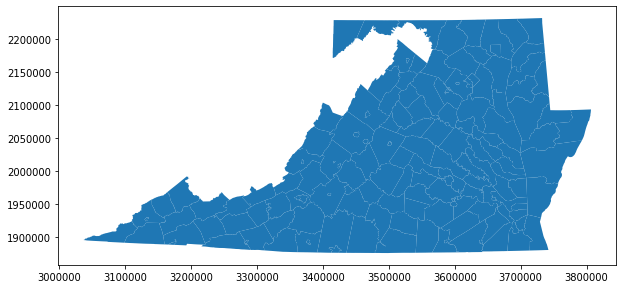

In [17]:
dmv_shp.plot(figsize = (10,10))
# One separate polygon for each county

In [18]:
dmv_shp.head()

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,11,001,01702382,11001,District of Columbia,District of Columbia,00,H6,G4020,548,47900,47894,F,158114680,18884970,+38.9041485,-077.0170942,"POLYGON ((3634326.277 2140859.068, 3634470.383..."
0,24,029,00593907,24029,Kent,Kent County,06,H1,G4020,None,None,None,A,717505271,353313295,+39.2391765,-076.1242003,"POLYGON ((3687545.260 2173512.770, 3688076.886..."
1,24,017,01676992,24017,Charles,Charles County,06,H1,G4020,548,47900,47894,A,1185563933,479715576,+38.4728532,-077.0154272,"POLYGON ((3621167.918 2078854.467, 3621136.574..."
2,24,011,00595737,24011,Caroline,Caroline County,06,H1,G4020,None,None,None,A,827292416,16789670,+38.8715312,-075.8316311,"POLYGON ((3729534.766 2118019.557, 3729456.680..."
3,24,001,01713506,24001,Allegany,Allegany County,06,H1,G4020,None,19060,None,A,1098563627,14954037,+39.6123087,-078.7031084,"POLYGON ((3479203.805 2228299.708, 3479237.162..."


Subsetting a GeoDataFrame

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
119,51,013,01480097,51013,Arlington,Arlington County,06,H1,G4020,548,47900,47894,A,67273573,244125,+38.8783374,-077.1007034,"POLYGON ((3616541.848 2138383.244, 3616604.513..."


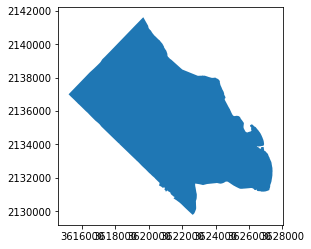

In [19]:
arl_shp = va_shp[va_shp['GEOID10'].isin(['51013'])]
arl_shp.plot()
arl_shp.head()

# Census bureau provides counties for entire states at the time, but what if I'm only interested in Arlington County
# We can subset like with Pandas using FIPS (Like SF in R)

In [20]:
arl_shp.crs

{'init': 'epsg:32146', 'no_defs': True}

Plotting Lines: Roads by County

In [21]:
county_fips = {
              #  'dc': '11001',
              #  'loudoun': '51107',
               'arlington': '51013',
               'richmond': '51760',
              #  'fairfax': '51059',
              #  'montgomery': '24031',
              #  'prince_georges': '24033',
               }
          
for loc, fip in county_fips.items():
    dwnld_extract_county_streets(loc, fip)

Read, Update CRS, and Plot Road Lines

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


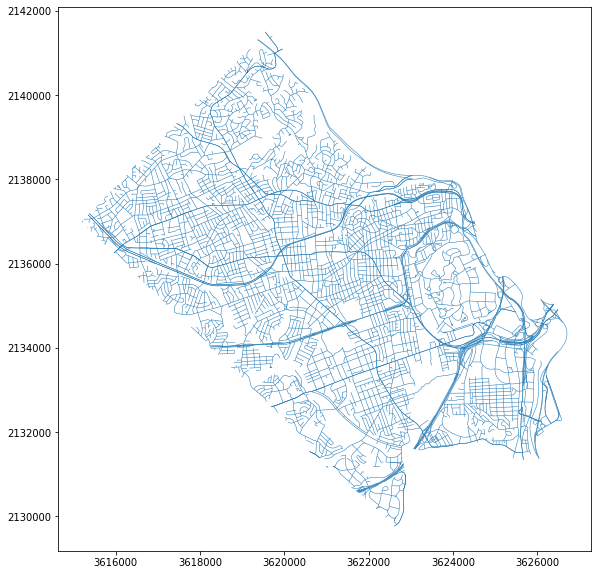

In [22]:
arl_roads = gpd.read_file('./shapefiles/county_streets/arlington/tl_2010_51013_roads.shp')
arl_roads = arl_roads.to_crs(epsg = 32146)
arl_roads.plot(linewidth = .5, figsize = (10, 10))

# Dataset provided at the county level so no subsetting needed.  Each row is for a street here. 

In [23]:
arl_roads

,STATEFP,COUNTYFP,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,51,013,110412846754,N Powhatan St,M,S1400,"LINESTRING (3617239.095 2136240.226, 3617239.4..."
1,51,013,110412845560,26th Rd N,M,S1400,"LINESTRING (3617132.403 2137388.056, 3617135.4..."
2,51,013,110412847228,N John Marshall Dr,M,S1400,"LINESTRING (3617237.346 2137325.542, 3617227.3..."
3,51,013,110412847090,N Kenilworth St,M,S1400,"LINESTRING (3617774.849 2137399.753, 3617768.0..."
4,51,013,110412846707,N McKinley St,M,S1400,"LINESTRING (3617550.270 2137156.185, 3617534.0..."
...,...,...,...,...,...,...,...
2466,51,013,110412845421,21st St N,M,S1400,"LINESTRING (3619397.577 2137249.615, 3619386.4..."
2467,51,013,1103738033502,N Jefferson Davis Hwy,M,S1200,"LINESTRING (3625198.023 2135305.989, 3625315.2..."
2468,51,013,110412846517,S Woodrow St,M,S1400,"LINESTRING (3621675.873 2131331.475, 3621697.3..."
2469,51,013,110412846180,S Quincy St,M,S1400,"LINESTRING (3622067.249 2132155.572, 3622084.3..."


Plotting Points: Arlington County Traffic Cameras

Downloading Traffic Camera Data from Arlington County Open Data Portal

In [24]:
ac_traffic_cam_url = 'https://data.arlingtonva.us/rest/datastreams/244392/data.csv'
os.makedirs('./shapefiles/arlington/', exist_ok=True)
r = requests.get(ac_traffic_cam_url)
with open('./shapefiles/arlington/arlington_traffic_cams.csv','wb') as f: 
    f.write(r.content)

Converting CSV with X, Y Coordinate Columns to GeoDataFrame

In [25]:
traffic_cams_df = pd.read_csv('./shapefiles/arlington/arlington_traffic_cams.csv')
traffic_cams_df

,Camera Site,Camera Encoder,Latitude,Longitude,port,STATUS
0,cam1,Columbia Pike @ Walter Reed,38.862563,-77.087020,8001,ONLINE
1,cam2,Columbia Pike @ Glebe Rd.,38.861252,-77.092040,8001,ONLINE
2,cam3,Columbia @ George Mason,38.858774,-77.101320,8001,ONLINE
3,cam4,Rt 50 @ Carlin Springs,38.866192,-77.128410,8001,ONLINE
4,cam5,Rt 50 @ Fillmore,38.873473,-77.089400,8001,ONLINE
...,...,...,...,...,...,...
278,cam291,Wilson Blvd @ Hudson St,38.886642,-77.096094,8001,ONLINE
279,cam294,Randolph St @ Parking Garage,38.878903,77.109274,8001,ONLINE
280,cam295,10th St @ Fire Station 4,38.884436,-77.095602,8001,ONLINE
281,cam297,RT 50 @ Fillmore Cam 2,38.873303,-77.088855,8001,ONLINE


Fixing Data Before Creating GeoDataFrame

In [26]:
traffic_cams_df.update(pd.Series([-77.109274], name='Longitude', index=[279]))
# There was a discrepancy in the data

Creating GeoDataFrame from pandas.DataFrame

In [27]:
traffic_cams = gpd.GeoDataFrame(traffic_cams_df, geometry = gpd.points_from_xy(x = traffic_cams_df.Longitude,
                                                                               y = traffic_cams_df.Latitude))
traffic_cams.crs = {'init':'epsg:4267'}
traffic_cams.head()

# We use the points from xy method of geopandas and we point x to long and y to lat

,Camera Site,Camera Encoder,Latitude,Longitude,port,STATUS,geometry
0,cam1,Columbia Pike @ Walter Reed,38.862563,-77.08702,8001,ONLINE,POINT (-77.08702 38.86256)
1,cam2,Columbia Pike @ Glebe Rd.,38.861252,-77.09204,8001,ONLINE,POINT (-77.09204 38.86125)
2,cam3,Columbia @ George Mason,38.858774,-77.10132,8001,ONLINE,POINT (-77.10132 38.85877)
3,cam4,Rt 50 @ Carlin Springs,38.866192,-77.12841,8001,ONLINE,POINT (-77.12841 38.86619)
4,cam5,Rt 50 @ Fillmore,38.873473,-77.08940,8001,ONLINE,POINT (-77.08940 38.87347)


Update CRS and Plot Points

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,Camera Site,Camera Encoder,Latitude,Longitude,port,STATUS,geometry
0,cam1,Columbia Pike @ Walter Reed,38.862563,-77.08702,8001,ONLINE,POINT (3622653.576 2133700.919)
1,cam2,Columbia Pike @ Glebe Rd.,38.861252,-77.09204,8001,ONLINE,POINT (3622220.163 2133548.711)
2,cam3,Columbia @ George Mason,38.858774,-77.10132,8001,ONLINE,POINT (3621419.001 2133261.353)
3,cam4,Rt 50 @ Carlin Springs,38.866192,-77.12841,8001,ONLINE,POINT (3619055.640 2134049.217)
4,cam5,Rt 50 @ Fillmore,38.873473,-77.08940,8001,ONLINE,POINT (3622428.425 2134908.678)


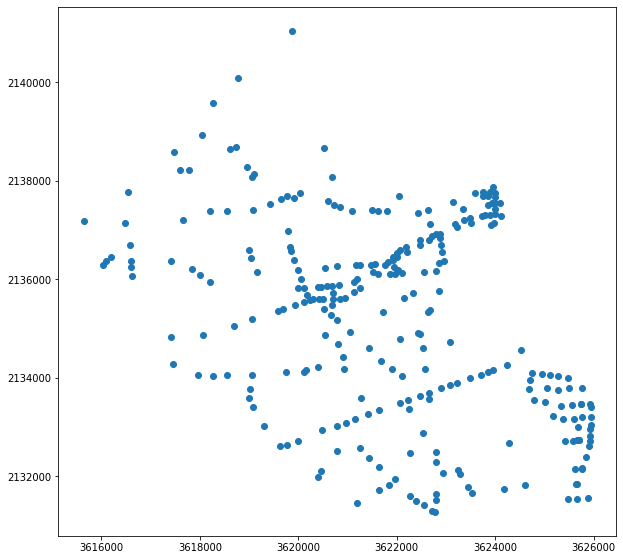

In [28]:
traffic_cams = traffic_cams.to_crs(epsg=32146)
traffic_cams.plot(figsize = (10, 10))
traffic_cams.head()

Bringing it All Together: Polygons, Lines, and Points
We can layer each of the above elements to view the the location of each of the traffic cameras in Arlington County.

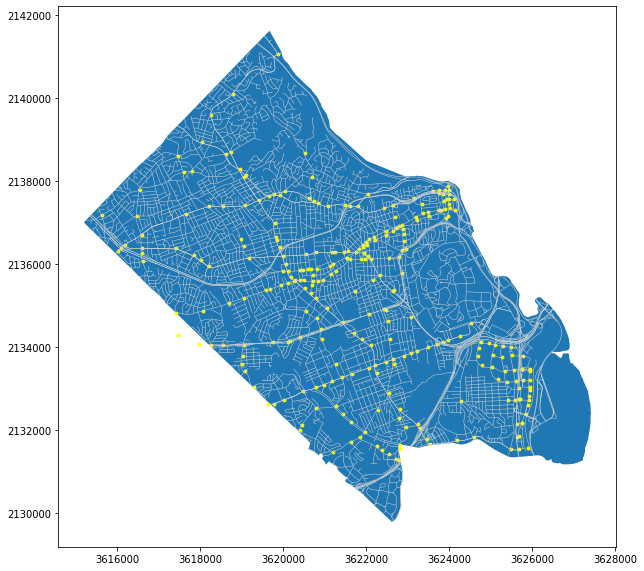

In [29]:
arl_boundaries  = arl_shp.plot(figsize = (10, 10))

arl_road_bounds = arl_roads.plot(color = 'lightgray',
                                      linewidth = .5,
                                      ax = arl_boundaries)

traffic_cams.plot(color = 'yellow',
                  markersize = 8,
                  ax = arl_road_bounds)

Exercise: Plot Richmond Points of Interest, Streets, and City Boundaries

In [30]:
richmond_poi_url = 'https://data.richmondgov.com/resource/f7vy-k94i.geojson'
os.makedirs('./shapefiles/richmond/', exist_ok=True)
r = requests.get(richmond_poi_url)
with open('./shapefiles/richmond/richmond_poi.geojson','wb') as f: 
    f.write(r.content)

Read in the file using GeoPandas

In [31]:
richmond_poi = gpd.read_file('./shapefiles/richmond/richmond_poi.geojson')

Update the Coordinate Reference System (CRS) to the appropriate SRID

In [32]:
richmond_poi = richmond_poi.to_crs(epsg = 4326)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Plot to see the points

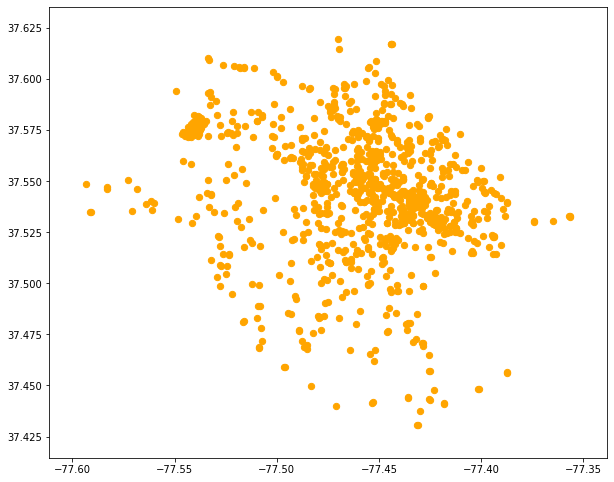

In [33]:
richmond_poi.plot(color = 'orange', markersize = 40, figsize = (10, 10))

Read in Richmond roads

In [34]:
richmond_roads = gpd.read_file('./shapefiles/county_streets/richmond/tl_2010_51760_roads.shp')

Update the CRS and plot

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


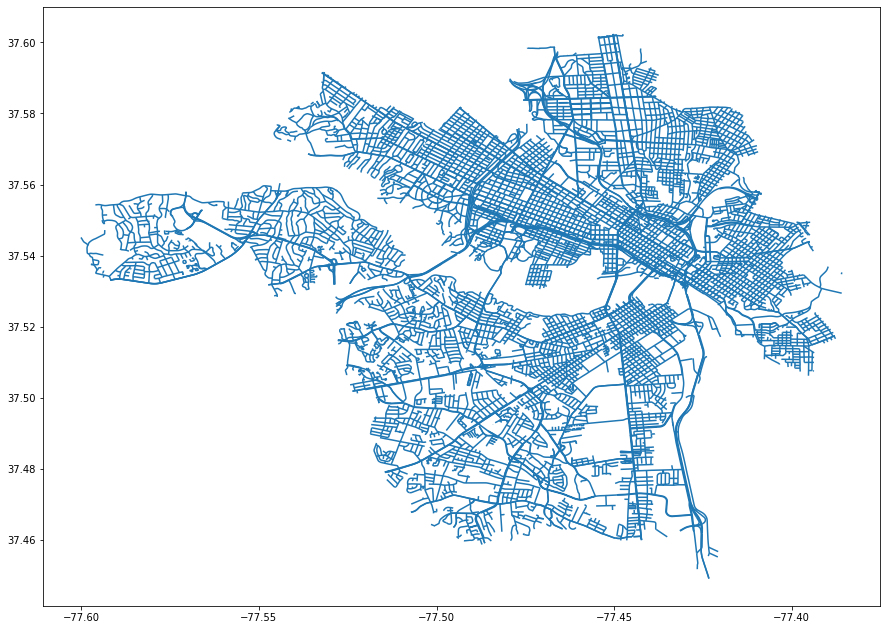

In [35]:
richmond_roads = richmond_roads.to_crs(epsg = 4326)
richmond_roads.plot(figsize = (15, 15))

Subset the Virginia County boundaries dataset to get Richmond City only

In [36]:
richmond_shp = va_shp[va_shp['GEOID10'].isin(['51760'])]
richmond_shp = richmond_shp.to_crs(epsg = 4326)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Bring it all together: plot the points and streets over the city boundaries

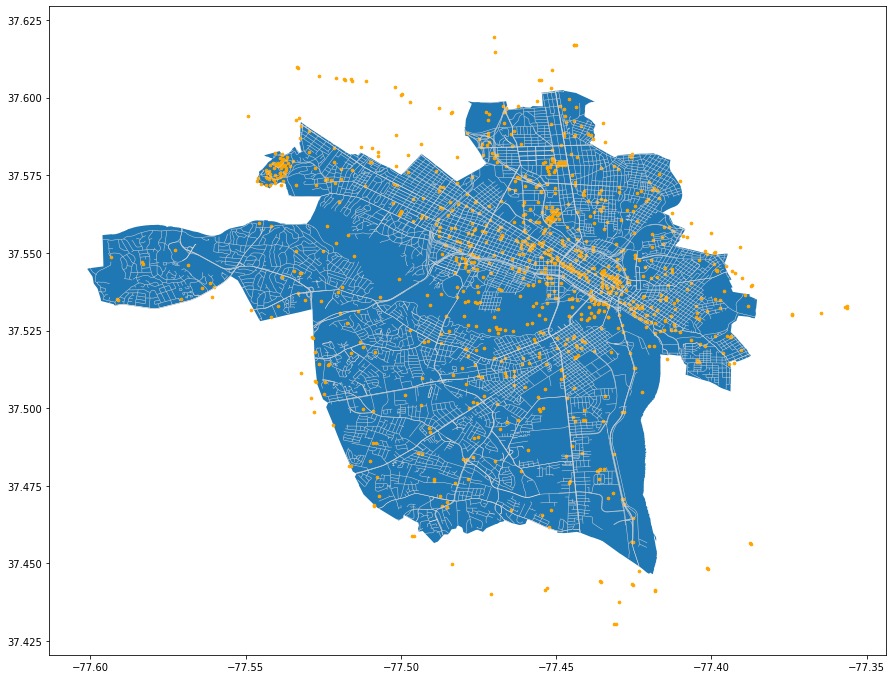

In [37]:
richmond_poi.plot(color = 'orange',
                  markersize = 7,
                  ax = richmond_roads.plot(color = 'lightgray',
                                           linewidth = .5,
                                           ax = richmond_shp.plot(figsize = (15, 15))))